In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [94]:
#accsessing the data and creating the dataframe for qb stats for the model
pbp_data = nfl.import_pbp_data([2020, 2021, 2022, 2023, 2024])

# Filter for pass plays by QBs
qb_plays = pbp_data[
    (pbp_data['play_type'] == 'pass') & 
    (pbp_data['season_type'] == 'REG') & 
    (pbp_data['passer_player_name'].notna())
].copy()

# Aggregate stats
qb_stats = qb_plays.groupby(['season', 'passer_player_id', 'passer_player_name']).agg({
    'complete_pass': 'sum',
    'interception': 'sum',
    'sack': 'sum',
    'yards_gained': 'sum',
    'pass_touchdown': 'sum',
    'play_type': 'count'
}).rename(columns={
    'play_type': 'attempts',
    'pass_touchdown': 'passing_tds',
    'passer_player_name': 'player_name'
}).reset_index()

# Same calculations as above
qb_stats['comp_pct'] = round(qb_stats['complete_pass'] / qb_stats['attempts'] * 100, 1)
qb_stats['ypa'] = round(qb_stats['yards_gained'] / qb_stats['attempts'], 1)
qb_stats['td_int_ratio'] = round(qb_stats['passing_tds'] / (qb_stats['interception'] + 1), 2)
qb_stats['td_rate'] = round(qb_stats['passing_tds'] / qb_stats['attempts'], 3)
qb_stats['int_rate'] = round(qb_stats['interception'] / qb_stats['attempts'], 3)

print(qb_stats.sort_values('yards_gained', ascending=False).head(10))

2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
     season passer_player_id passer_player_name  complete_pass  interception  \
121    2021       00-0019596            T.Brady          485.0          12.0   
296    2022       00-0033873          P.Mahomes          435.0          12.0   
232    2021       00-0036355          J.Herbert          443.0          15.0   
188    2021       00-0033873          P.Mahomes          436.0          13.0   
133    2021       00-0026498         M.Stafford          404.0          17.0   
544    2024       00-0036442           J.Burrow          460.0           9.0   
73     2020       00-0033873          P.Mahomes          390.0           6.0   
157    2021       00-0031280             D.Carr          428.0          14.0   
245    2022       00-0019596            T.Brady          490.0           9.0   
334    2022       00-0036355          J.Herbert          477.0          10.0   

     sack  yards_gained  passing_tds  attemp

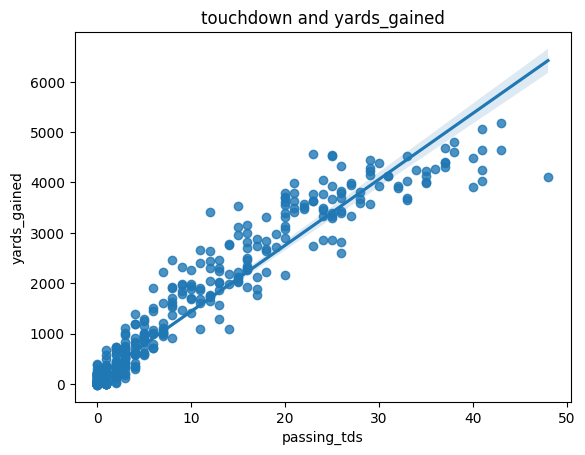

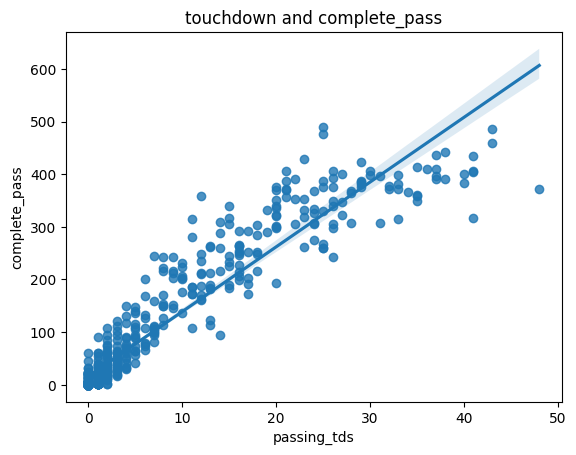

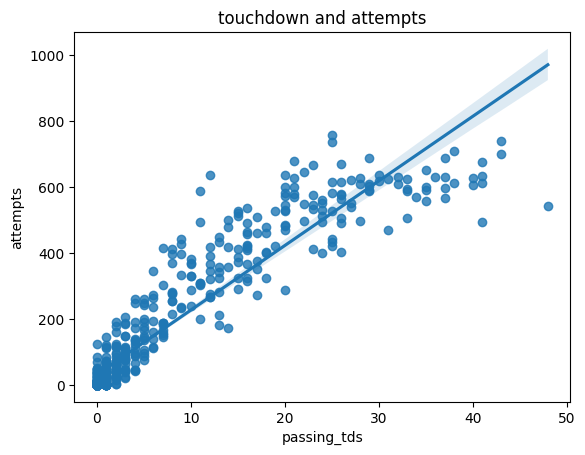

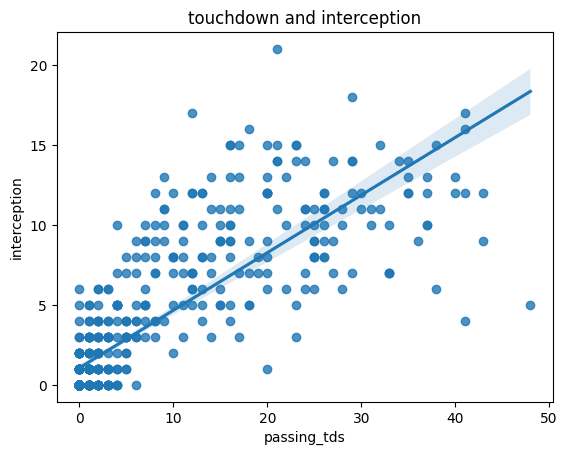

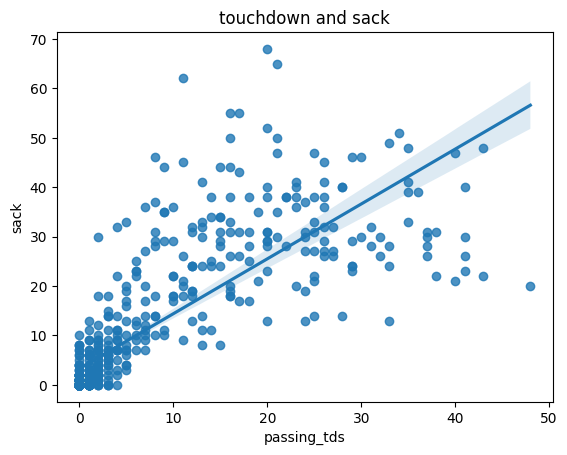

In [95]:
# Plotting the data and seeing the correlation between qb stats and touchdowns thrown
for y in ['yards_gained', 'complete_pass', 'attempts', 'interception', 'sack']:
    sns.regplot(data=qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

In [96]:
#copying the data to create a new column for a predictive model
# This is a simple regression model to predict future performance based on past performance
copy = qb_stats.copy()
copy['season'] = copy['season'].add(1)

new_qb_stats = (qb_stats.merge(copy, on = ['season',
 'passer_player_id', 'passer_player_name'], suffixes=('', '_prev'), how='left'))
new_qb_stats.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
546,2024,00-0036849,T.Atwell,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.00,0.000,0.000
307,2022,00-0034775,C.Kirk,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,33.0,0.0,1.0,100.0,33.0,0.00,0.000,0.000
291,2022,00-0033550,D.Webb,23.0,0.0,0.0,168.0,1.0,41,56.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2020,00-0031280,D.Carr,348.0,9.0,26.0,3955.0,27.0,540,64.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,2024,00-0037324,C.Oladokun,0.0,0.0,1.0,-5.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2021,00-0031345,J.Garoppolo,301.0,12.0,29.0,3611.0,20.0,469,64.2,...,5.0,11.0,1019.0,7.0,151.0,62.3,6.7,1.17,0.046,0.033
263,2022,00-0029701,R.Tannehill,212.0,6.0,33.0,2300.0,13.0,358,59.2,...,14.0,47.0,3409.0,21.0,578.0,61.8,5.9,1.40,0.036,0.024
51,2020,00-0031941,J.Crowder,1.0,0.0,0.0,43.0,1.0,1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,2021,00-0034577,K.Allen,12.0,0.0,2.0,115.0,1.0,22,54.5,...,1.0,7.0,566.0,4.0,96.0,62.5,5.9,2.00,0.042,0.010
460,2023,00-0038115,D.Bellinger,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


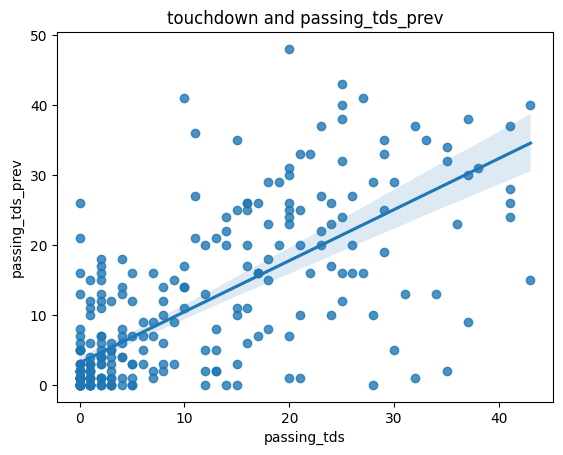

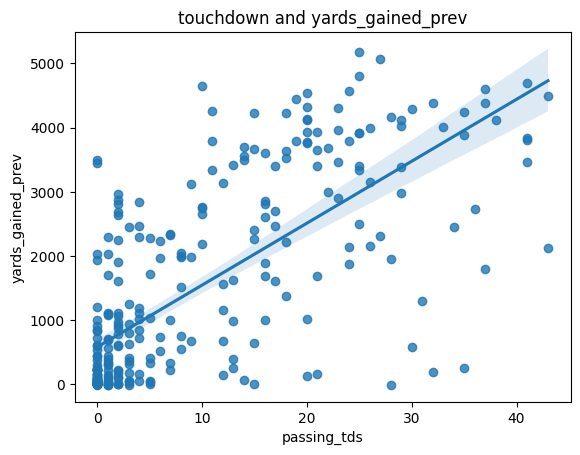

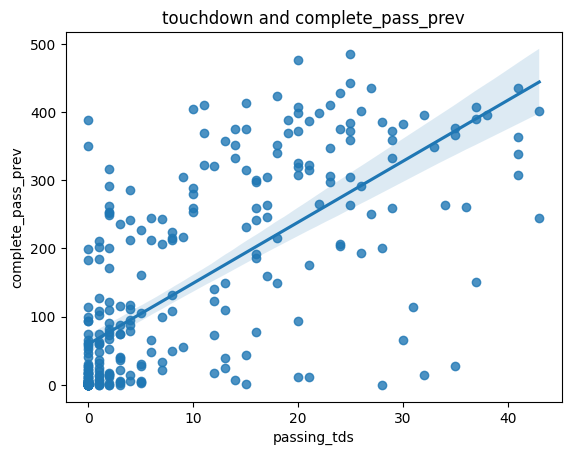

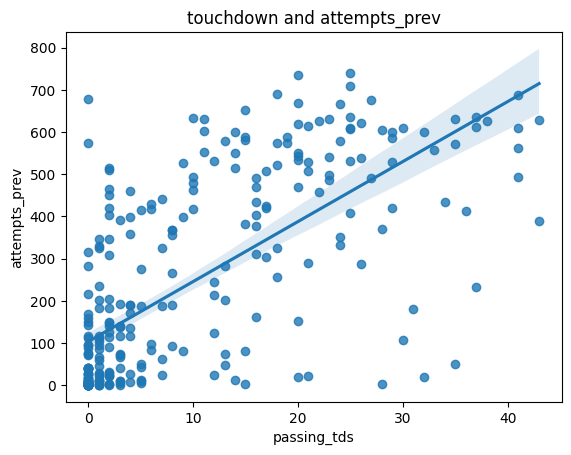

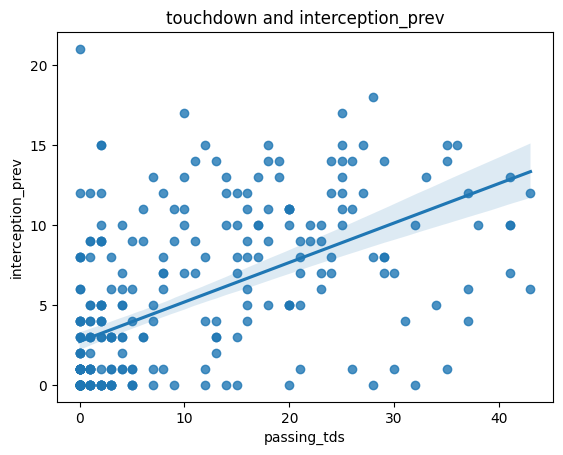

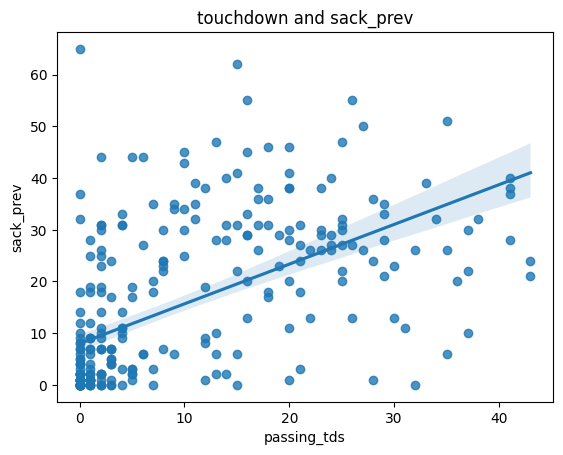

In [97]:
#plotting the data and seeing the correlation between previous qb stats and touchdowns thrown in the current season
for y in ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'attempts_prev', 'interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

# Predicting 2022 Touchdowns

In [98]:
#loading in the machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#training the model
features = ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'td_rate_prev',
             'interception_prev', 'int_rate_prev', 'ypa_prev', 'sack_prev', 'comp_pct_prev']
target = 'passing_tds'

# Creating a subset with no null values (especially for _prev columns)
model_data = new_qb_stats.dropna(subset=features + [target]).copy() # Use .copy() for better code practice

# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

#train on 2021 data
train_data = (model_data.loc[model_data['season'] < 2022])

#test on 2022 data
test_data = (model_data.loc[model_data['season']==2022])

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 6.904484417833103
r2: 0.6134648270502397


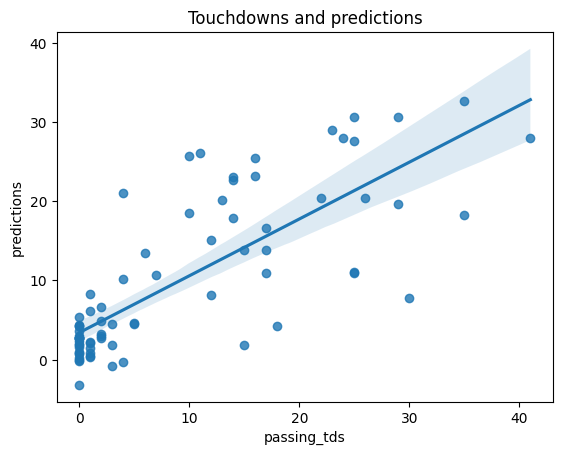

In [99]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [100]:
# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_id', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_id,passer_player_name,passing_tds,predictions
296,2022,00-0033873,P.Mahomes,41.0,27.934339
338,2022,00-0036442,J.Burrow,35.0,32.590382
310,2022,00-0034857,J.Allen,35.0,18.248467
265,2022,00-0030565,G.Smith,30.0,7.829233
262,2022,00-0029604,K.Cousins,29.0,30.646245
284,2022,00-0033106,J.Goff,29.0,19.666267
247,2022,00-0023459,A.Rodgers,26.0,20.357485
245,2022,00-0019596,T.Brady,25.0,30.565355
345,2022,00-0036971,T.Lawrence,25.0,11.008852
334,2022,00-0036355,J.Herbert,25.0,27.576734


# Predicting 2023 Touchdowns

In [101]:

# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

# Train on all data prior to 2023
train_data = model_data[model_data['season'] < 2023].copy()

# Test on 2023 data
test_data = model_data[model_data['season'] == 2023].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.970162158624268
r2: 0.3516805633162973


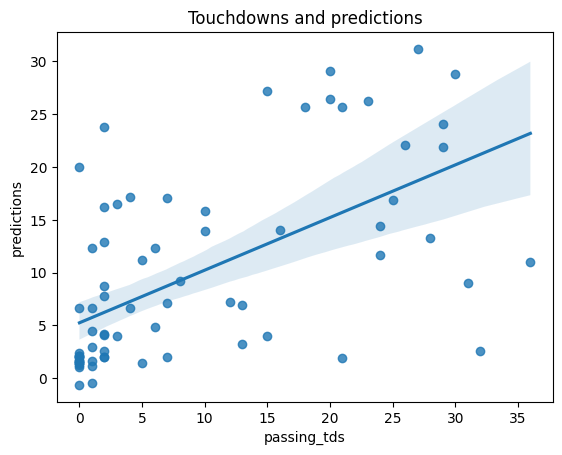

In [102]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [103]:
# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
388,2023,D.Prescott,36.0,10.971807
432,2023,J.Love,32.0,2.547467
457,2023,B.Purdy,31.0,9.034279
389,2023,J.Goff,30.0,28.737195
431,2023,T.Tagovailoa,29.0,21.886762
414,2023,J.Allen,29.0,23.997003
413,2023,B.Mayfield,28.0,13.257782
399,2023,P.Mahomes,27.0,31.154651
369,2023,R.Wilson,26.0,22.021569
376,2023,D.Carr,25.0,16.869263


# Predicting 2024 Touchdowns

In [104]:
# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] < 2024].copy()

# Test on 2024 data
test_data = model_data[model_data['season'] == 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.762881964662453
r2: 0.4286390428671399


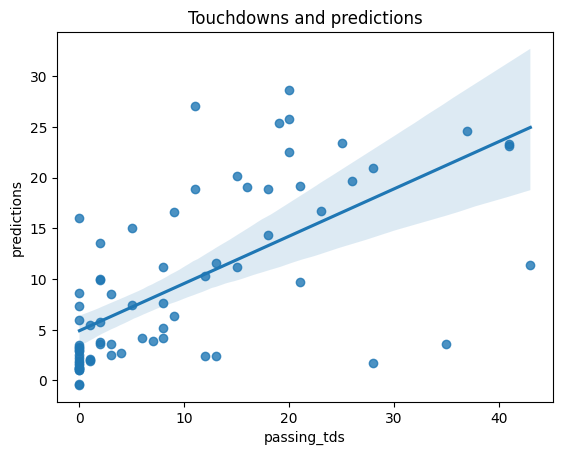

In [105]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [106]:
# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
544,2024,J.Burrow,43.0,11.376283
522,2024,L.Jackson,41.0,23.153888
525,2024,B.Mayfield,41.0,23.273357
503,2024,J.Goff,37.0,24.615112
527,2024,S.Darnold,35.0,3.539676
478,2024,A.Rodgers,28.0,1.748680
526,2024,J.Allen,28.0,20.899895
511,2024,P.Mahomes,26.0,19.648965
539,2024,J.Love,25.0,23.429042
542,2024,J.Herbert,23.0,16.704116


# Predicting 2025 Touchdowns

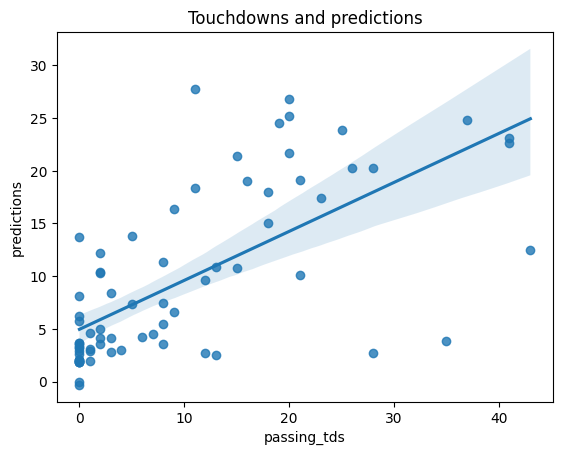

In [107]:
# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] <= 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [108]:
# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values('predictions', ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
502,2024,D.Prescott,11.0,27.810630
559,2024,B.Purdy,20.0,26.850698
575,2024,C.Stroud,20.0,25.186866
503,2024,J.Goff,37.0,24.841440
538,2024,T.Tagovailoa,19.0,24.554635
539,2024,J.Love,25.0,23.866628
525,2024,B.Mayfield,41.0,23.159952
522,2024,L.Jackson,41.0,22.639323
481,2024,M.Stafford,20.0,21.703634
490,2024,D.Carr,15.0,21.409058
